##  Veri setini iki kısma ayıracağız.
### 1. kısmi yapay zeka modelini(KNN) eğitmek için kullanacağız
### 2. kısmı iste modelimizin başarısını % olarak test etmek için kullanacağız.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [22]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


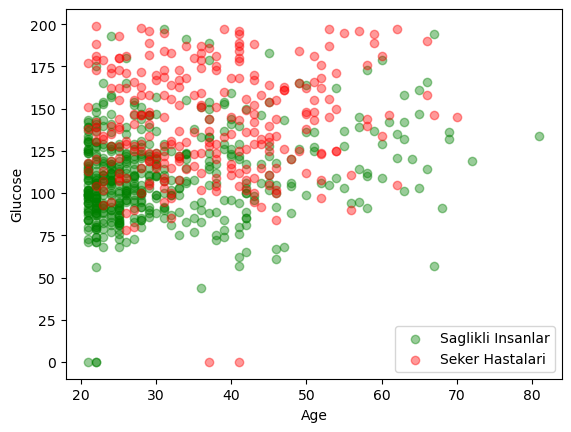

In [23]:
# Outcome =1 ise Şeker hastası
# Outcome =0 ise sağlıklı
seker_hastalari=data[data.Outcome==1]
saglikli_insanlar=data[data.Outcome==0]

plt.scatter(saglikli_insanlar.Age,saglikli_insanlar.Glucose,color="green",label="Saglikli Insanlar",alpha=0.4)
plt.scatter(seker_hastalari.Age,seker_hastalari.Glucose,color="red",label="Seker Hastalari",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()
# şeker hastaları ve sağlıklı insanların oluşturduğu gerçek grafik.

In [24]:
# x ve y eksenleri
y=data.Outcome.values
x_veri=data.drop(["Outcome"],axis=1)
# outcome sütununu çıkarım x_veri df sini oluşturalım.


print("Normalization before")
x_veri.head()

Normalization before


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [25]:
# normalization yapılmalı tüm değerler 0-1 arasına çekilmeli yoksa büyük değerler küçük değerleri ezer.
print("Normalization after")
x=(x_veri-np.min(x_veri))/(np.max(x_veri)-np.min(x_veri))
x.head()

Normalization after


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007092,0.174941,0.085106,0.041371,0.000000,0.039716,0.000741,0.059102
1,0.001182,0.100473,0.078014,0.034279,0.000000,0.031442,0.000415,0.036643
2,0.009456,0.216312,0.075650,0.000000,0.000000,0.027541,0.000794,0.037825
3,0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823
4,0.000000,0.161939,0.047281,0.041371,0.198582,0.050946,0.002704,0.039007


In [40]:
# train data ile test datasının ayrılması gerekiyor
# train datayı modeli eğitmek için kullanılacak
# test data ise modeli test etmek ve doğruluk % si hesaplamak için kullanılacak.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
predicted=knn.predict(x_test)
print("k=0 için test verilerinin doğrulama testi sonucu ",knn.score(x_test,y_test))

k=0 için test verilerinin doğrulama testi sonucu  0.7359307359307359


In [45]:
count=1
for k in range(1,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    predicted=knn.predict(x_test)
    print(count," ","Doğruluk oranı:% ",knn.score(x_test,y_test)*100)
    count+=1

1   Doğruluk oranı:%  79.22077922077922
2   Doğruluk oranı:%  74.02597402597402
3   Doğruluk oranı:%  77.92207792207793
4   Doğruluk oranı:%  74.02597402597402
5   Doğruluk oranı:%  72.72727272727273
6   Doğruluk oranı:%  75.32467532467533
7   Doğruluk oranı:%  74.02597402597402
8   Doğruluk oranı:%  76.62337662337663
9   Doğruluk oranı:%  76.62337662337663
10   Doğruluk oranı:%  76.62337662337663
11   Doğruluk oranı:%  77.92207792207793
12   Doğruluk oranı:%  77.92207792207793
13   Doğruluk oranı:%  77.92207792207793
14   Doğruluk oranı:%  79.22077922077922
15   Doğruluk oranı:%  79.22077922077922
16   Doğruluk oranı:%  77.92207792207793
17   Doğruluk oranı:%  79.22077922077922
18   Doğruluk oranı:%  79.22077922077922
19   Doğruluk oranı:%  77.92207792207793


In [36]:
# k=16 de en yüksek doğruluğu veriyor.
# 16  Doğruluk oranı:%  78.57142857142857

# test_size=0.1 yaparsak k=17 de en yüksek doğruluğu veriyor
# 17   Doğruluk oranı:%  79.22077922077922